<a href="https://colab.research.google.com/github/RodolphoSartori/Macro/blob/main/BRL_USD_nov_dez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bcb

In [5]:
from bcb import currency
import pandas as pd
import plotnine as p9
import numpy as np

In [31]:
pares = currency.get(
    symbols = ["USD"],
    start = "2024-11-01",
    end = pd.to_datetime("today").date(),
    side = "ask"
)
pares

,USD
Date,
2024-11-01,5.8073
2024-11-04,5.7898
2024-11-05,5.7846
2024-11-06,5.7648
2024-11-07,5.6624
2024-11-08,5.7648
2024-11-11,5.7980
2024-11-12,5.7694
2024-11-13,5.7713


In [32]:
# Redefinindo o índice como uma coluna
pares = pares.reset_index()
pares

,Date,USD
0,2024-11-01,5.8073
1,2024-11-04,5.7898
2,2024-11-05,5.7846
3,2024-11-06,5.7648
4,2024-11-07,5.6624
5,2024-11-08,5.7648
6,2024-11-11,5.7980
7,2024-11-12,5.7694
8,2024-11-13,5.7713
9,2024-11-14,5.7885


In [33]:
pares['variacao'] = pares['USD'].pct_change()
pares

,Date,USD,variacao
0,2024-11-01,5.8073,NaN
1,2024-11-04,5.7898,-0.003013
2,2024-11-05,5.7846,-0.000898
3,2024-11-06,5.7648,-0.003423
4,2024-11-07,5.6624,-0.017763
5,2024-11-08,5.7648,0.018084
6,2024-11-11,5.7980,0.005759
7,2024-11-12,5.7694,-0.004933
8,2024-11-13,5.7713,0.000329
9,2024-11-14,5.7885,0.002980


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


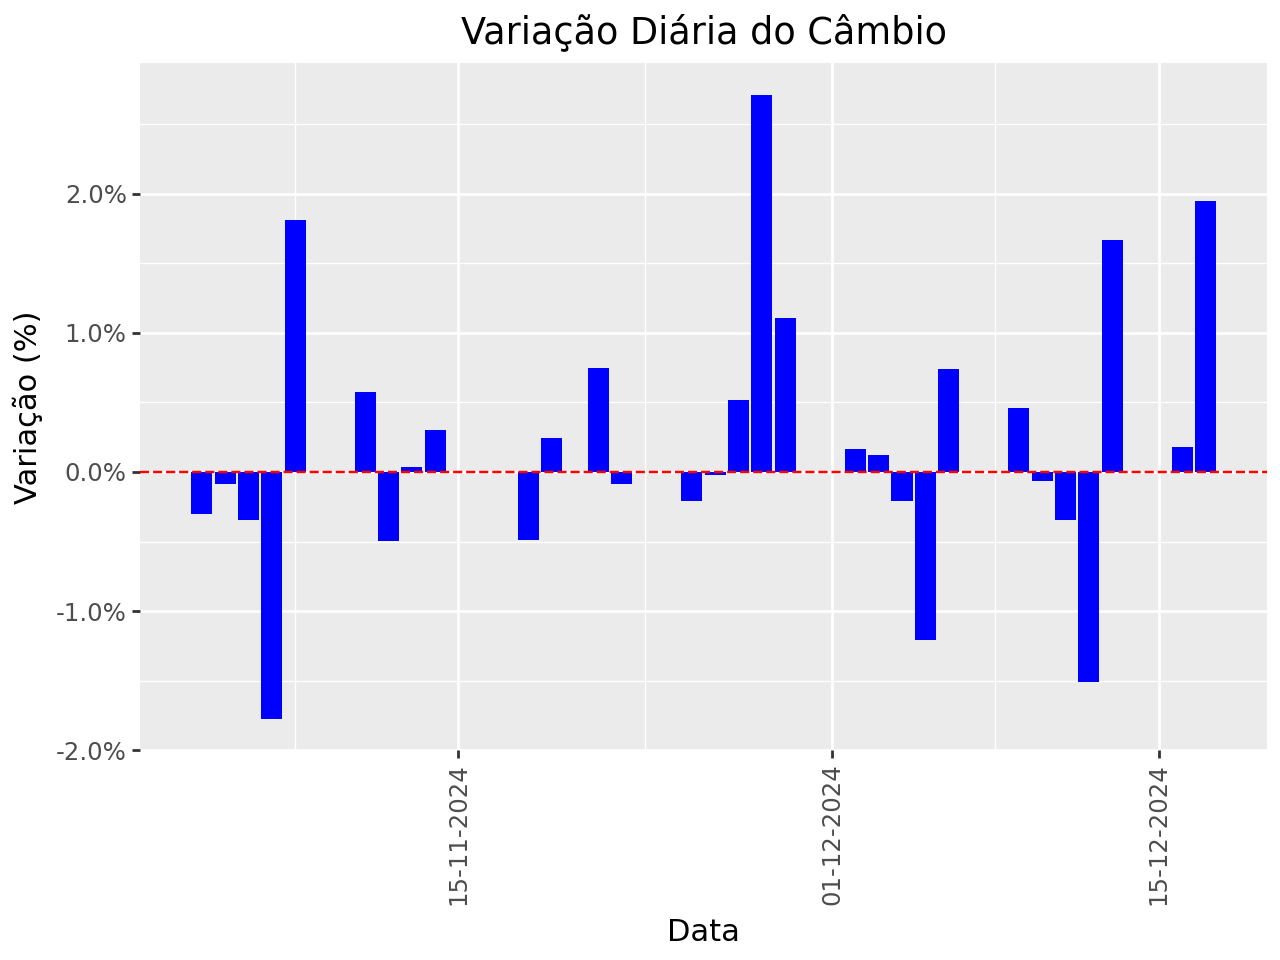

In [34]:
import plotnine as p9
from matplotlib.ticker import PercentFormatter

(p9.ggplot(pares)
+ p9.aes(x='Date', y='variacao')
+ p9.geom_col(fill="blue")
+ p9.theme(axis_text_x=p9.element_text(angle=90))
+ p9.labs(title='Variação Diária do Câmbio', x='Data', y='Variação (%)')
+ p9.geom_hline(yintercept=0, linetype="dashed", color="red")
+ p9.scale_x_date(date_labels="%d-%m-%Y")
+ p9.scale_y_continuous(labels=lambda l: ["{:.1%}".format(v) for v in l]) # Formata os rótulos como porcentagem usando after_stat
)